![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [52]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

Create dataframes

In [53]:
workout = pd.read_csv("data/workout.csv")
keywords = pd.read_csv("data/three_keywords.csv")
workout_geo = pd.read_csv("data/workout_geo.csv")
keywords_geo = pd.read_csv("data/three_keywords_geo.csv")

## EDA
Look at the dataframes - make sure data types make sense and there are no missing/blank values, etc

In [54]:
# Workout
workout.info() #no null values, date as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [55]:
# Workout Geo
workout_geo.info() #mostly null values for workout_2018_2023 field - no data for several countries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            250 non-null    object 
 1   workout_2018_2023  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [56]:
# Keywords
keywords.info() #no null values, date as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   61 non-null     object
 1   home_workout_worldwide  61 non-null     int64 
 2   gym_workout_worldwide   61 non-null     int64 
 3   home_gym_worldwide      61 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [57]:
# Keywords Geo
keywords_geo.info() #several null values - there's no data for many countries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 250 non-null    object 
 1   home_workout_2018_2023  47 non-null     float64
 2   gym_workout_2018_2023   47 non-null     float64
 3   home_gym_2018_2023      47 non-null     float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Task 1: When was the global search for "workout" at its peak?

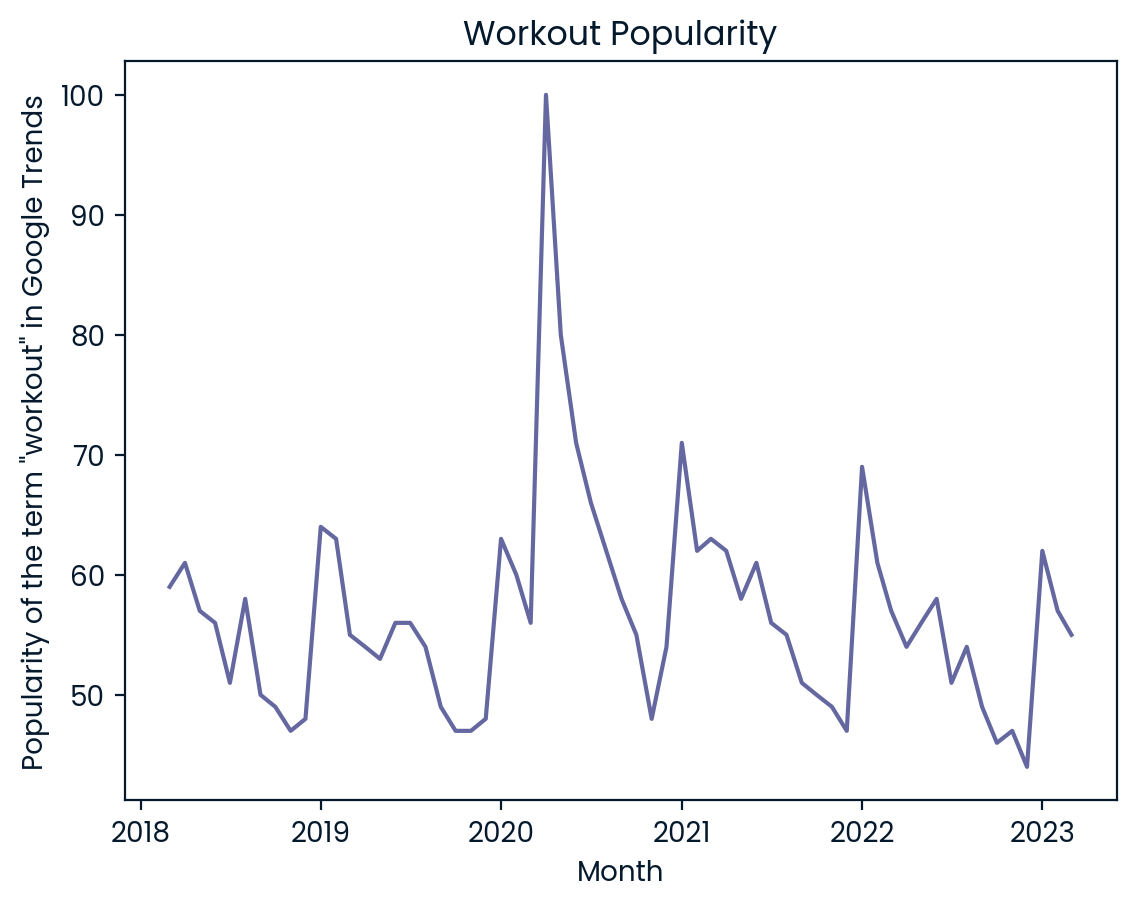

'2020'

In [58]:
# Build a line chart with the score for 'workout' and get the max value

# Turn date field to type datetime
workout['month'] = pd.to_datetime(workout['month'])

# Build graph
plt.plot(workout['month'], workout['workout_worldwide'])
plt.title('Workout Popularity')
plt.xlabel('Month')
plt.ylabel('Popularity of the term "workout" in Google Trends')
plt.show()

# Get index for max value
max_value_index = workout['workout_worldwide'].idxmax()

# Get month for max value
date_max_value = workout['month'][max_value_index]

# Retrieve year
year_str = date_max_value.strftime('%Y')
year_str

Get most popular keywords during covid pandemic and now

In [59]:
# We assume the COVID pandemic spans all of 2020, and that 'today' is 2023
# We'll use only the national database

# Convert month field to datetime
keywords['month'] = pd.to_datetime(keywords['month'])

# Get the keywords database only for 2020
keywords_2020 = keywords[keywords['month'].dt.year==2020]

# Get average scoring for keywords along 2020
mean_home_workout = keywords_2020['home_workout_worldwide'].mean()
mean_gym_workout = keywords_2020['gym_workout_worldwide'].mean()
mean_home_gym = keywords_2020['home_gym_worldwide'].mean()

# Create a dict with the values for 2020
dict_2020 = {}
dict_2020['home_workout'] = mean_home_workout
dict_2020['gym_workout'] = mean_gym_workout
dict_2020['home_gym'] = mean_home_gym

# Get keyword with max mean for covid
peak_covid = max(dict_2020, key=dict_2020.get)

# Get the keywords database only for 2023
keywords_2023 = keywords[keywords['month'].dt.year==2023]

# Get average scoring for keywords along 2023
mean_home_workout_current = keywords_2023['home_workout_worldwide'].mean()
mean_gym_workout_current = keywords_2023['gym_workout_worldwide'].mean()
mean_home_gym_current = keywords_2023['home_gym_worldwide'].mean()

# Create a dict with the values for 2023
dict_2023 = {}
dict_2023['home_workout'] = mean_home_workout_current
dict_2023['gym_workout'] = mean_gym_workout_current
dict_2023['home_gym'] = mean_home_gym_current

# Get current keyword with max mean
current = max(dict_2023, key=dict_2023.get)

Get country with highest interest for workouts among these three: US, Japan and Australia

In [60]:
# Filter the worldwide dataset for those countries
workout_geo_tc = workout_geo[(workout_geo['country']=='United States')|(workout_geo['country']=='Australia')|(workout_geo['country']=='Japan')] # tc='three countries'

# Get max value index
max_workout_index = workout_geo_tc['workout_2018_2023'].idxmax()

# Get country for max value index
top_country = workout_geo_tc['country'][max_workout_index]

Identify highest interest in workout between Philippines and Malaysia in home workouts

In [61]:
# Filter the worldwide dataset for those countries
keywords_geo_pm = keywords_geo[(keywords_geo['Country']=='Philippines')|(keywords_geo['Country']=='Malaysia')][['Country', 'home_workout_2018_2023']] # ph='philippines malaysia'

keywords_geo_pm.head()

# Get max value index
max_index = keywords_geo_pm['home_workout_2018_2023'].idxmax()

# Get country for max value index
home_workout_geo = keywords_geo_pm['Country'][max_index]